In [9]:
import pandas as pd 

#load datasets
customers = pd.read_csv('../ecommerce-analysis/data/Customers.csv')
products = pd.read_csv('../ecommerce-analysis/data/Products.csv')
transactions = pd.read_csv('../ecommerce-analysis/data/Transactions.csv')

#check basic stats
print (customers.head())
print(products.describe())
print (transactions.info())

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   

In [10]:

#merge transactions with products
merged = pd.merge(transactions, products, on='ProductID', how='left')

#merge result with customers
merged = pd.merge(merged, customers, on="CustomerID", how="left")

#check the merged dataset
print(merged.head())

  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067   2024-04-25 7:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue  Price_x                      ProductName     Category  Price_y  \
0      300.68   300.68  ComfortLiving Bluetooth Speaker  Electronics   300.68   
1      300.68   300.68  ComfortLiving Bluetooth Speaker  Electronics   300.68   
2      300.68   300.68  ComfortLiving Bluetooth Speaker  Electronics   300.68   
3      601.36   300.68  ComfortLiving Bluetooth Speaker  Electronics   300.68   
4      902.04   300.68  ComfortLiving Bluetooth Speaker  Electronics   300.68   

      CustomerName         Region  SignupDate  
0   Andrea Jenkins         Europe  202

Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64


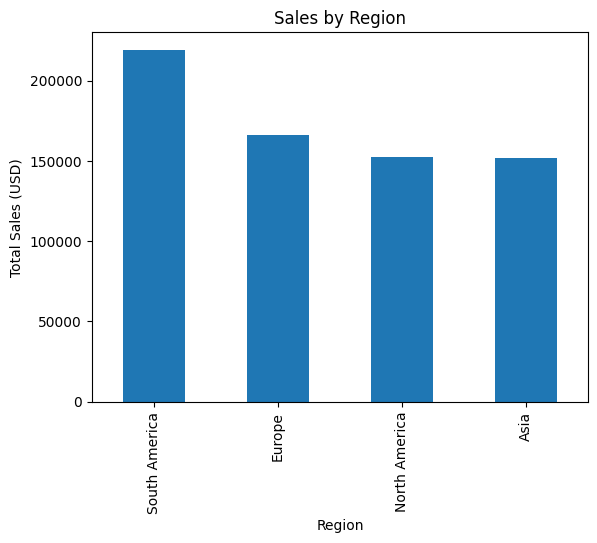

In [11]:

#Insight 1 : Sales by region
sales_by_region = merged.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
print(sales_by_region)

import matplotlib.pyplot as plt

sales_by_region.plot(kind="bar", title='Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales (USD)')
plt.show()

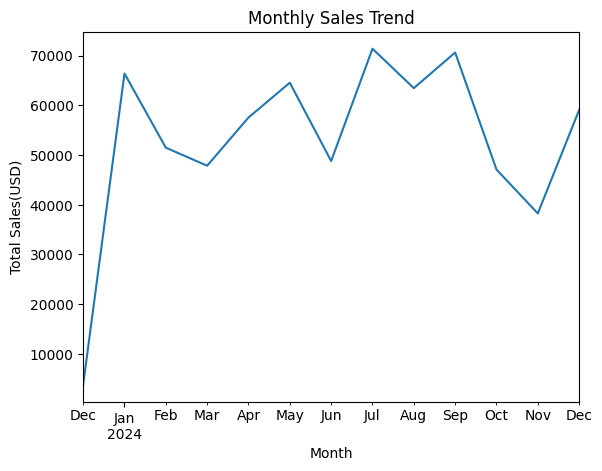

In [12]:

#Insight 2 : Monthly sales Trend
merged['TransactionDate'] = pd.to_datetime(merged['TransactionDate'])
merged['Month'] = merged['TransactionDate'].dt.to_period('M')
monthly_sales = merged.groupby('Month')['TotalValue'].sum()

monthly_sales.plot(kind='line', title='Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales(USD)')
plt.show()

Category
Books          192147.47
Electronics    180783.50
Clothing       166170.66
Home Decor     150893.93
Name: TotalValue, dtype: float64


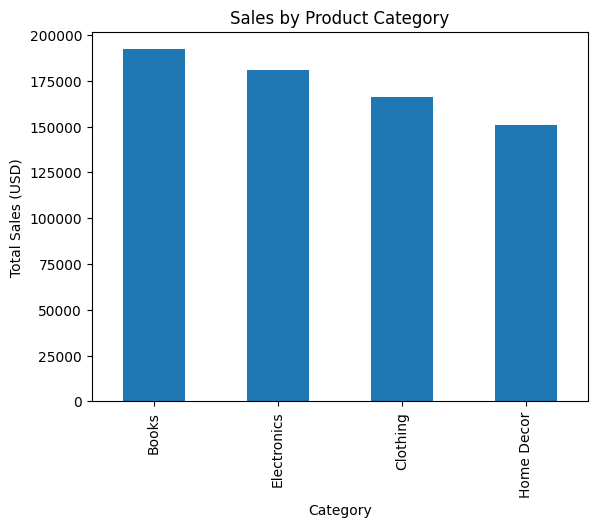

In [13]:
#Insight 3 : Top Product Categories

sales_by_category = merged.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
print(sales_by_category)

sales_by_category.plot(kind='bar',title='Sales by Product Category')
plt.xlabel('Category')
plt.ylabel('Total Sales (USD)')
plt.show()

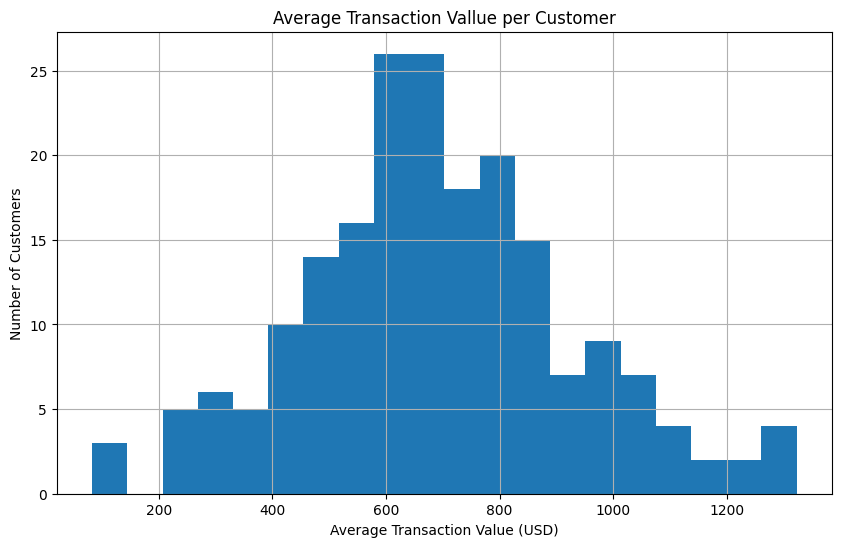

In [14]:
#Insight 4 : Customer Behaviour

avg_transaction_value = merged.groupby('CustomerID')['TotalValue'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
avg_transaction_value.hist(bins=20)
plt.title('Average Transaction Vallue per Customer')
plt.xlabel('Average Transaction Value (USD)')
plt.ylabel('Number of Customers')
plt.show()

TotalValue
Low       106292.84
Medium    211316.35
High      372386.37
Name: TotalValue, dtype: float64


/var/folders/ck/w6496mys0h7_b957q128cnk40000gn/T/ipykernel_51471/8493112.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  revenue_by_segment =total_values.groupby(customer_segments).sum()


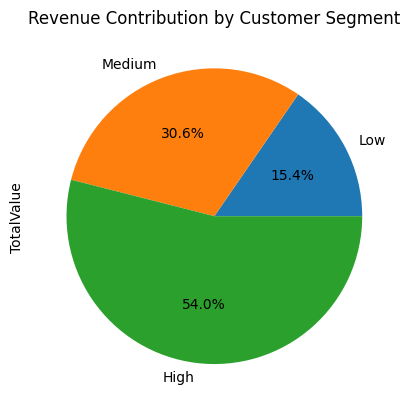

In [15]:
#Insight 5 : Revenue Contribution by Customer Segment
total_values = merged.groupby('CustomerID')['TotalValue'].sum()
total_values = total_values.fillna(0)
total_values = total_values[total_values > 0]

customer_segments = pd.qcut(total_values, q=3, labels=['Low', 'Medium', 'High'])
revenue_by_segment =total_values.groupby(customer_segments).sum()
revenue_by_segment = revenue_by_segment.fillna(0)
print(revenue_by_segment)

revenue_by_segment.plot(kind='pie', autopct = '%1.1f%%')
plt.title('Revenue Contribution by Customer Segment')
plt.show()
